In [1]:
import pymongo

In [2]:
cliente = pymongo.MongoClient()
cliente.list_database_names()
db = cliente.companies
db.collection_names()
colec = db.com

<ipython-input-2-cc278c9a9206>:4: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


In [37]:
#list(colec.find())
import pandas as pd 
import numpy as np
import folium



oficinas = colec.find()

df = pd.DataFrame(oficinas)
df.columns
df1 = df

df = df.reset_index()
df.loc[df['number_of_employees'].idxmax()]



display(df.iloc[5776]['offices'])
list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'offices.zip_code': '80333'}]},{'name':1}))
m = folium.Map(location=[48.143954756384524, 11.575684547424318], tiles='stamentoner', zoom_start=15)
lat_siemenz= '48.143954756384524'
lon_siemenz = '11.575684547424318'
zeblat = '48.1365635'
zeblon = '11.5886703'
Brien_lat = '48.1469267'
Brien_lon = '11.560622'
IDEO_lat= '48.130541'
IDEO_lon = '11.5952663'

empresas_names = ['Siemens', 'MegaZebra', 'IDEO']
empresas_lat = ['48.143954756384524', '48.1365635', '48.130541']
empresas_lon = ['11.575684547424318','11.5886703','11.5952663']
### pon las otras dos empresas 
lat_tacos = ['48.1503616','48.1427', '48.1332057']
lon_tacos = ['11.5783252', '11.5552', '11.5836412']
#folium.Marker([lat, lon],icon=folium.Icon(color='red'), popup='<i>Siemens</i>', tooltip='Siemens').add_to(m)
#folium.Marker([zeblat, zeblon], icon=folium.Icon(color='red'), popup='<i>Megazebra</i>', tooltip='Megazebra').add_to(m)
for i in range(len(lat_tacos)):
    folium.Marker([lat_tacos[i], lon_tacos[i]], icon=folium.Icon(color='blue'),popup = '<b>Aqui hay una taqueria</b>', tooltip = 'taqueria').add_to(m)
for i in range(len(empresas_names)) :
    folium.Marker([empresas_lat[i], empresas_lon[i]], icon= folium.Icon(color='red'), popup = f'<b>{empresas_names[i]}</b>', tooltip = f'{empresas_names[i]}').add_to(m)
m

[{'description': '',
  'address1': 'Wittelsbacherplatz 2',
  'address2': '',
  'zip_code': '80333',
  'city': 'Munich',
  'state_code': None,
  'country_code': 'DEU',
  'latitude': None,
  'longitude': None}]

In [38]:
df.columns


## relacion entre precio actual con total money raised, funding rounds ipo and today price (esa la debes buscar tu )

Index(['index', '_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username', 'category_code',
       'number_of_employees', 'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'tag_list', 'alias_list', 'email_address',
       'phone_number', 'description', 'created_at', 'updated_at', 'overview',
       'image', 'products', 'relationships', 'competitions', 'providerships',
       'total_money_raised', 'funding_rounds', 'investments', 'acquisition',
       'acquisitions', 'offices', 'milestones', 'video_embeds', 'screenshots',
       'external_links', 'partners', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'ipo'],
      dtype='object')

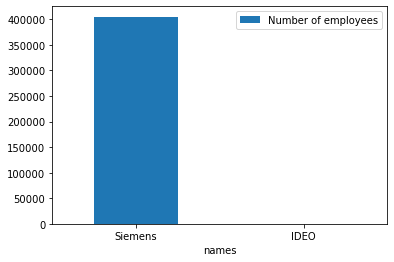

In [35]:


list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'Siemens' }]},{'name':1, 'number_of_employees' :1}))
##405000 Siemens employees

list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'MegaZebra' }]},{'name':1, 'number_of_employees' :1}))

### MEGAZEBRA number of employees NAN

list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'IDEO' }]},{'name':1, 'number_of_employees' :1}))

##IDEO number of employees 500


data = [['Siemens', 405000], ['IDEO', 500]]

#DF = pd.DataFrame(data, columns = ['Name', 'Number of employees'])
#ax = DF.plot.bar(rot = 0)


DF = pd.DataFrame({'names': ['Siemens', 'IDEO'], 'Number of employees': [405000, 500]})
ax = DF.plot.bar(x = 'names', y = 'Number of employees', rot = 0)


## por lo visto lo mejor es ponerla cerca de Siemens 

In [13]:
list(colec.find({"offices.city":'Munich'},{'name':1, 'number_of_employees' : 1}))

#list(colec.find({'$and':[{'number_of_employees': {'$gte': 500}},
 #                           {'offices.city':'Munich'}]}, 
 #              {'name':1}))

[{'_id': ObjectId('52cdef7c4bab8bd675297da8'),
  'name': 'OpenX',
  'number_of_employees': 305},
 {'_id': ObjectId('52cdef7c4bab8bd675297f3c'),
  'name': 'Adknowledge',
  'number_of_employees': 300},
 {'_id': ObjectId('52cdef7c4bab8bd675298060'),
  'name': 'tyntec',
  'number_of_employees': 150},
 {'_id': ObjectId('52cdef7c4bab8bd6752982c2'),
  'name': 'amiando',
  'number_of_employees': 76},
 {'_id': ObjectId('52cdef7c4bab8bd6752984b4'),
  'name': 'Moconso',
  'number_of_employees': nan},
 {'_id': ObjectId('52cdef7c4bab8bd6752984c9'),
  'name': 'Topicle',
  'number_of_employees': 2},
 {'_id': ObjectId('52cdef7c4bab8bd6752985fc'),
  'name': 'iCrossing',
  'number_of_employees': 550},
 {'_id': ObjectId('52cdef7c4bab8bd6752986b5'),
  'name': 'Zankapfel',
  'number_of_employees': 2},
 {'_id': ObjectId('52cdef7c4bab8bd675298753'),
  'name': 'andUNITE',
  'number_of_employees': nan},
 {'_id': ObjectId('52cdef7c4bab8bd67529878b'),
  'name': 'Gofresh',
  'number_of_employees': nan},
 {'_id': 

In [179]:
#df['City'] = pd.DataFrame([x for x in df['offices']])['country_code'] no reconoce la columna dentro del diccionario 

#df1 = pd.DataFrame(MyList, columns=["x"]).groupby('x').size().to_dict() sirve para hacer df la lista que obtengas

#cities = [d.get('city') for d in df.dic] Dataframe has not atribute dic


dx=df1.set_index(['name']).offices.apply(pd.Series).stack().index

df2 =pd.DataFrame(df1.set_index(['name']).offices.apply(pd.Series).stack().values.tolist()).reset_index()

df2.head(10)
###juntalos por ciudad en el dataframe

df2['city'].value_counts()
##San francisco the city with more companies in this df

df3 = pd.concat([df1, df2], axis = 1)


d = df3.groupby(['city'])['number_of_employees'].agg('sum').max()
d['city']
#66777 es el numero mas grande de empleados 
#d.idxmax()
#New york
#print (d[(d == 'San francisco').all()])


###lo que te falta esta en notas 
poner las otras dos locaciones de empresas ya tienes lat y long
hacer una grafica del numero de empelados de cada una
haces los labs e intentas otra vez sacar la ciudad con mas empleados 

TypeError: 'float' object is not subscriptable